In [58]:
import os
import shutil
import json

import sys
sys.path.append("..")

import numpy as np
from scipy.ndimage import zoom

import matplotlib.pyplot as plt

from LandSlideDyna.viz import ArrayVisualizer

In [59]:
models_wrong_res = ['00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00116', '00117', '00118', '00119', '00120', '00121', '00122', '00123', '00124', '00125', '00126', '00127', '00128', '00129', '00130', '00131', '00132', '00133', '00134', '00135', '00136', '00137', '00138', '00139', '00140', '00141', '00142', '00143', '00144', '00145', '00146', '00147', '00156', '00157', '00158', '00186', '00187', '00189', '00190', '00209', '00215', '00216', '00217', '00218', '00219', '00222', '00241', '00244', '00245', '00247', '00248', '00251', '00254', '00256', '00272', '00273', '00274', '00275', '00276', '00277', '00278', '00279', '00282', '00283', '00284', '00285', '00286', '00287', '00292', '00301', '00302', '00303', '00304', '00306', '00307', '00308', '00309', '00310', '00311', '00312', '00313', '00314', '00394', '00395', '00396', '00397', '00398', '00399', '00400', '00401', '00402', '00403', '00404', '00405', '00407', '00408']

In [60]:
# def copy_subfolders(src_dir, dest_dir, subfolder_names):
#     """Copy specified subfolders from the source directory to the destination directory.

#     Args:
#         src_dir (str): The path to the source directory.
#         dest_dir (str): The path to the destination directory.
#         subfolder_names (list of str): A list of subfolder names to copy.

#     Raises:
#         FileNotFoundError: If a subfolder does not exist in the source directory.
#     """
#     for subfolder_name in subfolder_names:
#         # Construct the full path of the source and destination subfolders
#         src_subfolder_path = os.path.join(src_dir, subfolder_name)
#         dest_subfolder_path = os.path.join(dest_dir, subfolder_name)

#         # Check if the source subfolder exists
#         if not os.path.exists(src_subfolder_path):
#             raise FileNotFoundError(f"Subfolder '{subfolder_name}' not found in source directory.")

#         # Copy the subfolder to the destination directory
#         shutil.copytree(src_subfolder_path, dest_subfolder_path, dirs_exist_ok=True)
        
#         print(f"Subfolder '{subfolder_name}' copied successfully.")

# source_dir = r"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data"

# dest_dir = r"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp"

# copy_subfolders(source_dir, dest_dir, models_wrong_res)

In [61]:
viz = ArrayVisualizer()

In [62]:
model_id = "00136"

state_no = 50

thick_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\thickness\{model_id}_thickness_{state_no}.npy"
vel_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\velocity\{model_id}_velocity_{state_no}.npy"
topo_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\elevation\{model_id}_elevation_z_values.npy"

json_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\{model_id}_metadata.json"

# Read JSON file
with open(json_path) as file:
    json_data = json.load(file)

# Extract value using known key
original_res = json_data['grid_resolution_x']
print(f"Original Resolution: {original_res}")

thick_array = np.load(thick_array_path)
vel_array = np.load(vel_array_path)
topo_array = np.load(topo_array_path)

Original Resolution: 5.0


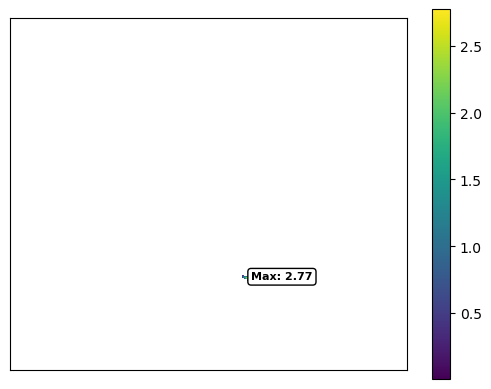

Maximum value in the array: 2.77


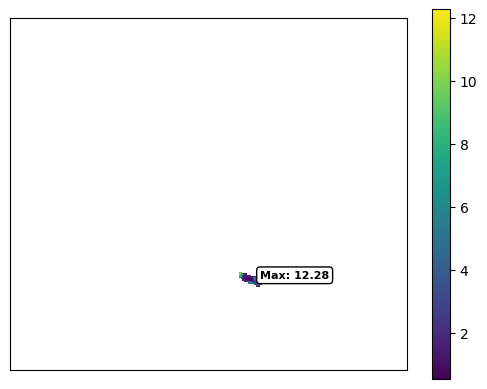

Maximum value in the array: 12.28


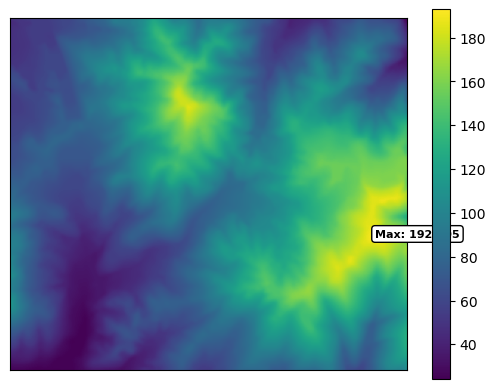

Maximum value in the array: 192.905


In [63]:
viz.plot_array(thick_array)
viz.plot_array(vel_array)
viz.plot_array(topo_array)

In [64]:
def interpolate_to_target_resolution(grid_data, current_resolution, target_resolution, order):
    """Interpolate a single-channel grid to a target resolution of 2 meters.

    Args:
        grid_data (numpy.ndarray): The 2D array representing the grid to be resampled.
        current_resolution (float): The current resolution of the grid_data (in meters).
        target_resolution (float, optional): The target resolution to resample the grid_data to (in meters).
                                             Default is 2.0 meters.

    Returns:
        numpy.ndarray: The resampled grid data with the target resolution.
    """
    # No need to resample if the current resolution is already the target resolution
    if current_resolution == target_resolution:
        return grid_data

    # Calculate the zoom factor required to go from the current to the target resolution
    zoom_factor = current_resolution / target_resolution

    # Perform the interpolation using cubic interpolation by default
    interpolated_grid = zoom(grid_data, zoom_factor, order=order)

    return interpolated_grid



In [65]:
target_res = 2.0

In [66]:
interpolated_topo_0 = interpolate_to_target_resolution(topo_array, original_res, target_res, order=0)
interpolated_thickness_0 = interpolate_to_target_resolution(thick_array, original_res, target_res, order=0)
interpolated_velocity_0 = interpolate_to_target_resolution(vel_array, original_res, target_res, order=0)

interpolated_topo_1 = interpolate_to_target_resolution(topo_array, original_res, target_res, order=1)
interpolated_thickness_1 = interpolate_to_target_resolution(thick_array, original_res, target_res, order=1)
interpolated_velocity_1 = interpolate_to_target_resolution(vel_array, original_res, target_res, order=1)

interpolated_topo_2 = interpolate_to_target_resolution(topo_array, original_res, target_res, order=2)
interpolated_thickness_2 = interpolate_to_target_resolution(thick_array, original_res, target_res, order=2)
interpolated_velocity_2 = interpolate_to_target_resolution(vel_array, original_res, target_res, order=2)

interpolated_topo_3 = interpolate_to_target_resolution(topo_array, original_res, target_res, order=3)
interpolated_thickness_3 = interpolate_to_target_resolution(thick_array, original_res, target_res, order=3)
interpolated_velocity_3 = interpolate_to_target_resolution(vel_array, original_res, target_res, order=3)

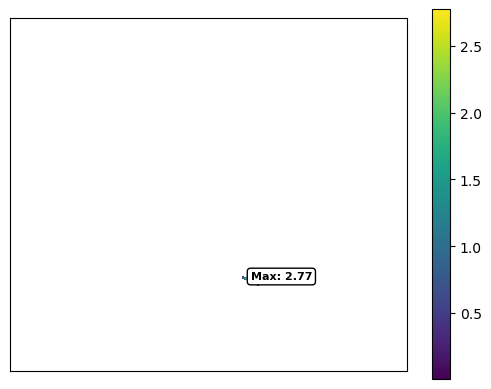

Maximum value in the array: 2.77


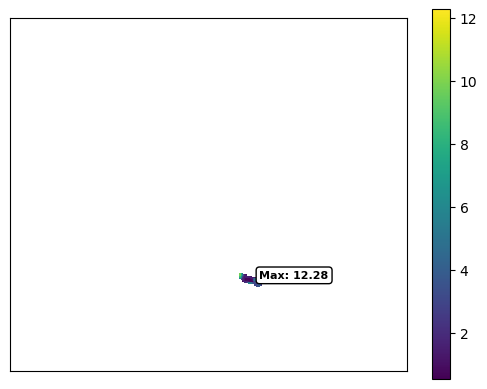

Maximum value in the array: 12.28


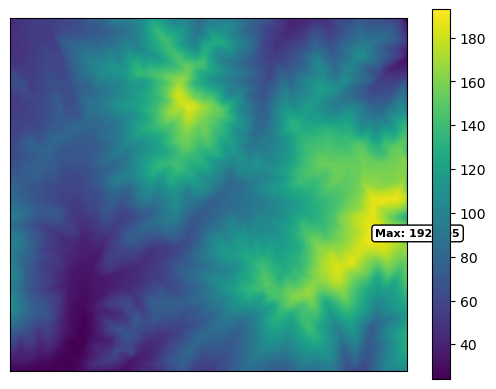

Maximum value in the array: 192.905


In [67]:
viz.plot_array(interpolated_thickness_0)
viz.plot_array(interpolated_velocity_0)
viz.plot_array(interpolated_topo_0)

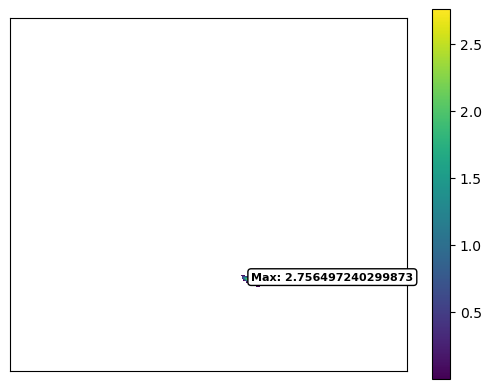

Maximum value in the array: 2.756497240299873


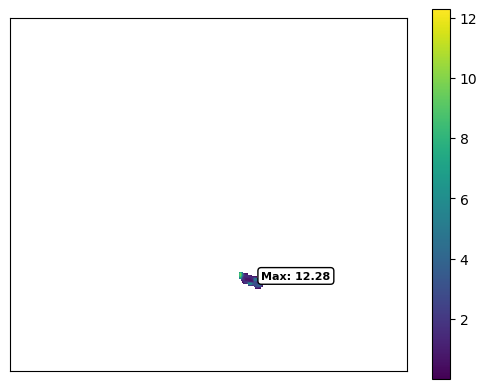

Maximum value in the array: 12.28


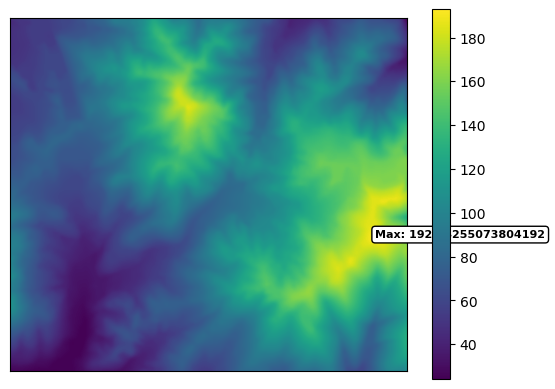

Maximum value in the array: 192.84255073804192


In [68]:
viz.plot_array(interpolated_thickness_1)
viz.plot_array(interpolated_velocity_1)
viz.plot_array(interpolated_topo_1)

In [69]:
print(topo_array.shape)
print(interpolated_topo.shape)

(239, 269)
(328, 335)


In [70]:
def compare_distributions(original_data, interpolated_data):
    """Compare the original and interpolated distributions using histograms and summary statistics.

    Args:
        original_data (numpy.ndarray): The original grid data.
        interpolated_data (numpy.ndarray): The interpolated grid data.
    """
    # Calculate summary statistics for both datasets
    original_stats = {
        'mean': np.mean(original_data),
        'median': np.median(original_data),
        'std': np.std(original_data),
        'min': np.min(original_data),
        'max': np.max(original_data)
    }
    
    interpolated_stats = {
        'mean': np.mean(interpolated_data),
        'median': np.median(interpolated_data),
        'std': np.std(interpolated_data),
        'min': np.min(interpolated_data),
        'max': np.max(interpolated_data)
    }

    # Print summary statistics
    print("Original Data Statistics:")
    for key, value in original_stats.items():
        print(f"{key.capitalize()}: {value:.2f}")

    print("\nInterpolated Data Statistics:")
    for key, value in interpolated_stats.items():
        print(f"{key.capitalize()}: {value:.2f}")

    # Plot histograms for visual comparison
    plt.figure(figsize=(12, 6))

    # Histogram for original data
    plt.subplot(1, 2, 1)
    plt.hist(original_data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title('Original Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Histogram for interpolated data
    plt.subplot(1, 2, 2)
    plt.hist(interpolated_data.flatten(), bins=50, color='orange', alpha=0.7)
    plt.title('Interpolated Data Distribution')
    plt.xlabel('Value')

    plt.tight_layout()
    plt.show()

Original Data Statistics:
Mean: 95.23
Median: 90.54
Std: 36.85
Min: 24.16
Max: 192.91

Interpolated Data Statistics:
Mean: 95.31
Median: 90.64
Std: 36.84
Min: 24.16
Max: 192.91


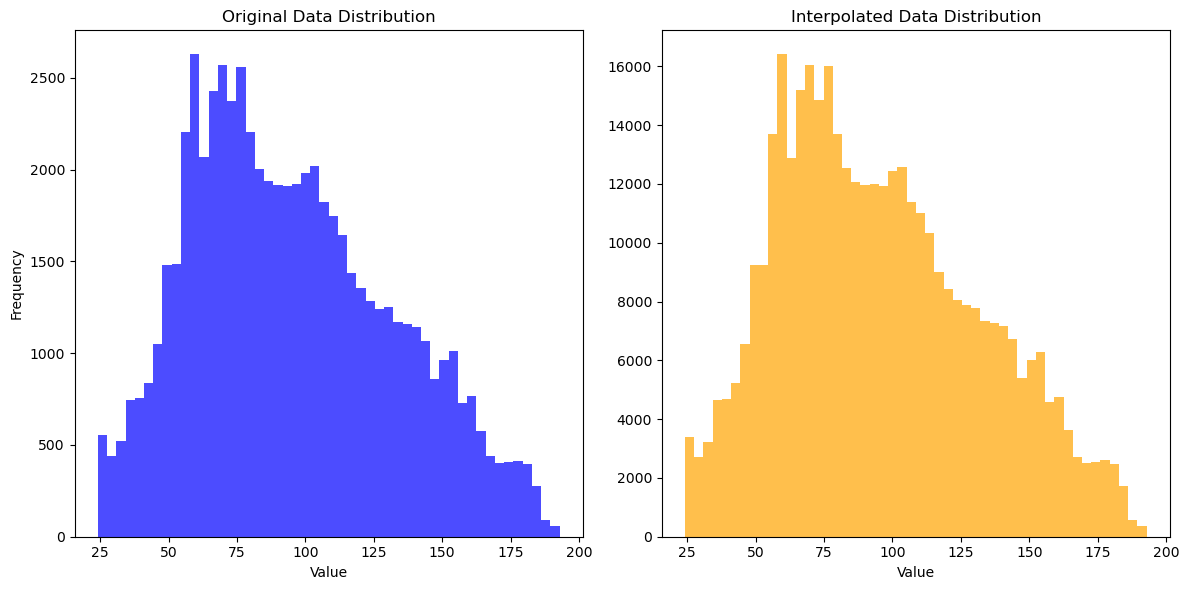

In [71]:
compare_distributions(topo_array, interpolated_topo_0)

Original Data Statistics:
Mean: 95.23
Median: 90.54
Std: 36.85
Min: 24.16
Max: 192.91

Interpolated Data Statistics:
Mean: 95.31
Median: 90.66
Std: 36.83
Min: 24.17
Max: 192.84


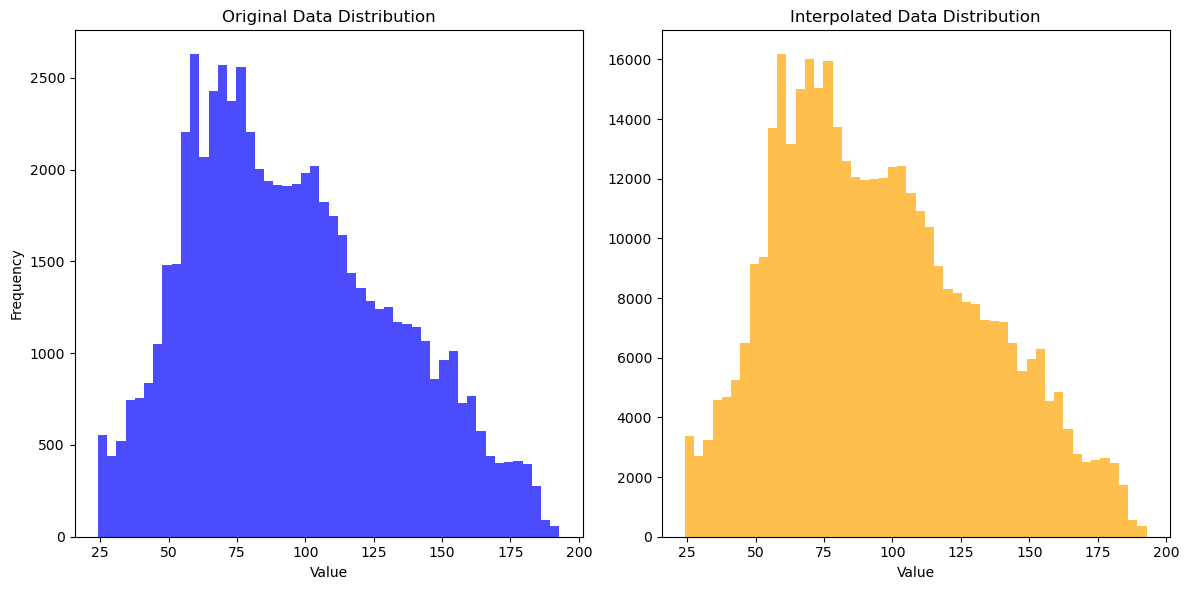

In [72]:
compare_distributions(topo_array, interpolated_topo_1)

Original Data Statistics:
Mean: 95.23
Median: 90.54
Std: 36.85
Min: 24.16
Max: 192.91

Interpolated Data Statistics:
Mean: 95.31
Median: 90.64
Std: 36.84
Min: 24.15
Max: 192.98


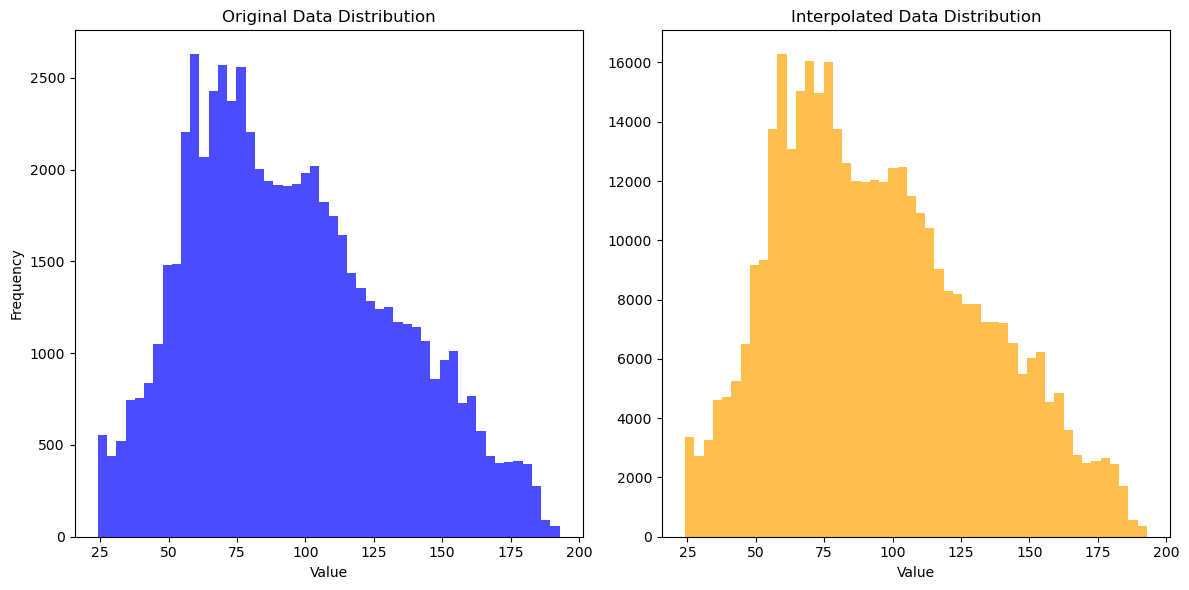

In [73]:
compare_distributions(topo_array, interpolated_topo_2)

Original Data Statistics:
Mean: 0.01
Median: 0.00
Std: 0.19
Min: 0.00
Max: 12.28

Interpolated Data Statistics:
Mean: 0.01
Median: 0.00
Std: 0.19
Min: 0.00
Max: 12.28


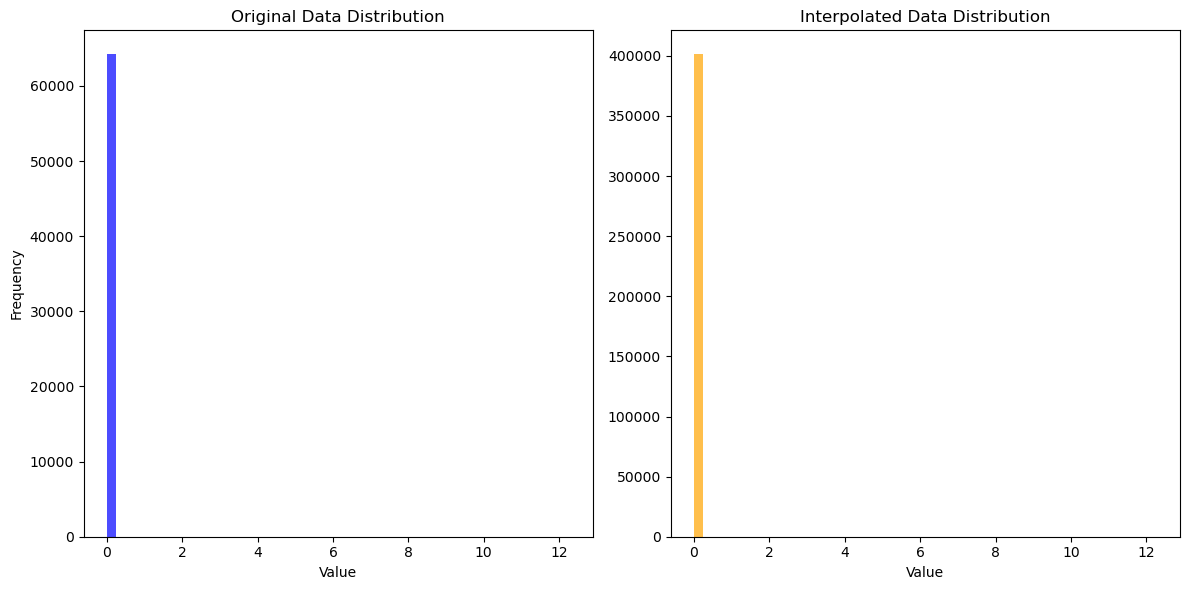

In [74]:
compare_distributions(vel_array, interpolated_velocity_0)

Original Data Statistics:
Mean: 0.01
Median: 0.00
Std: 0.19
Min: 0.00
Max: 12.28

Interpolated Data Statistics:
Mean: 0.01
Median: 0.00
Std: 0.17
Min: 0.00
Max: 12.28


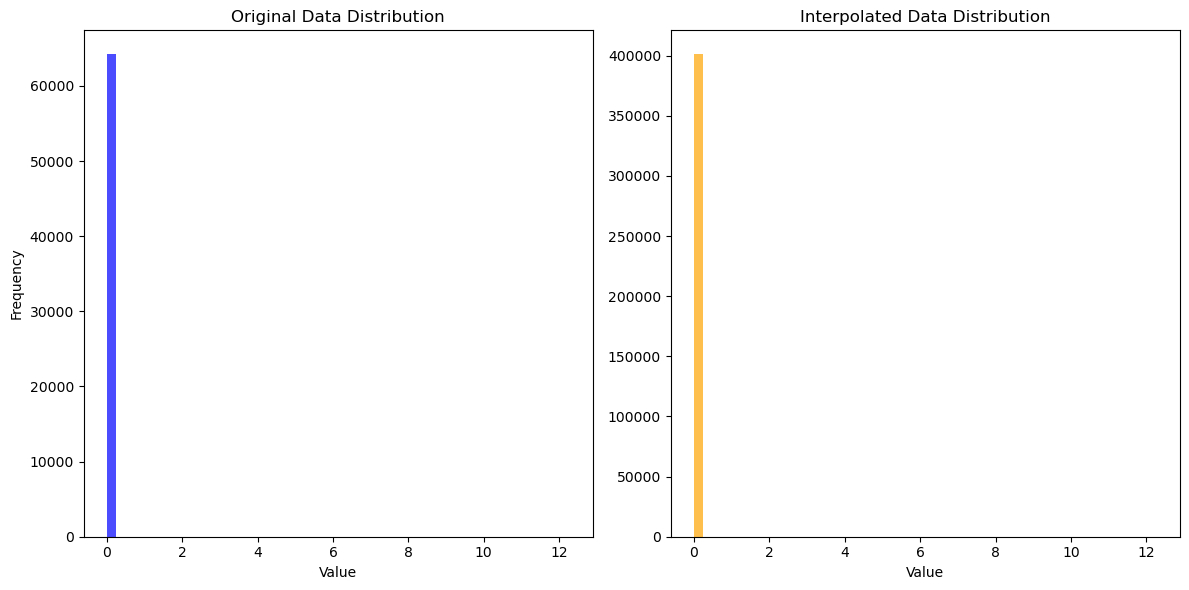

In [75]:
compare_distributions(vel_array, interpolated_velocity_1)

Original Data Statistics:
Mean: 0.01
Median: 0.00
Std: 0.19
Min: 0.00
Max: 12.28

Interpolated Data Statistics:
Mean: 0.01
Median: -0.00
Std: 0.19
Min: -1.42
Max: 15.31


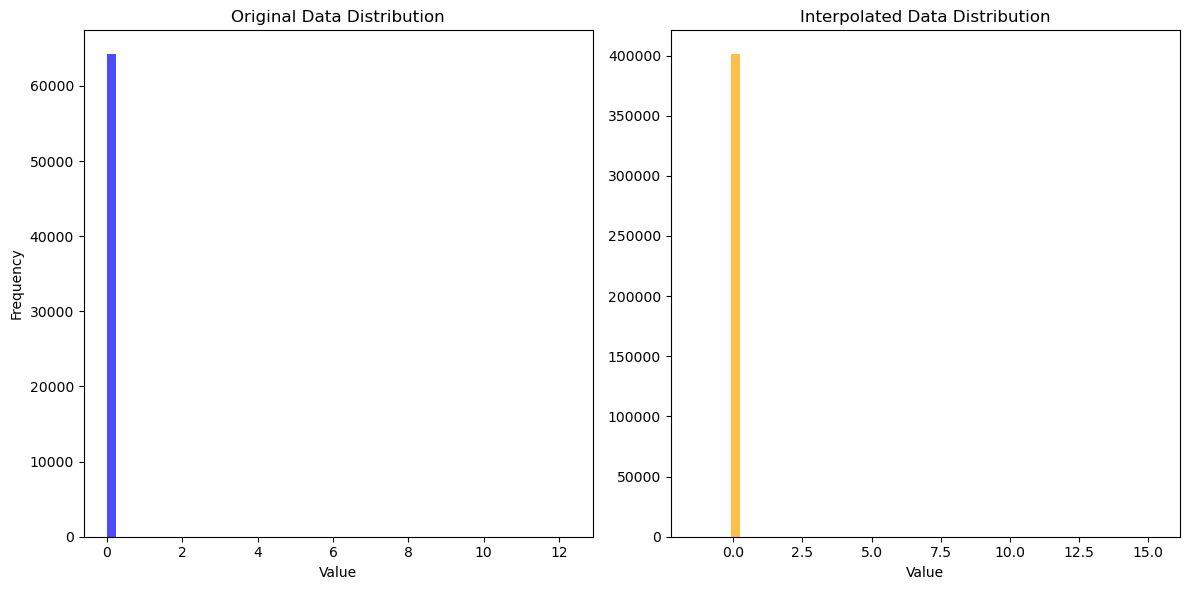

In [76]:
compare_distributions(vel_array, interpolated_velocity_2)

In [77]:
model_id = "00002"

state_no = 22

thick_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\thickness\{model_id}_thickness_{state_no}.npy"
vel_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\velocity\{model_id}_velocity_{state_no}.npy"
topo_array_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\03_initial_process\elevation\{model_id}_elevation_z_values.npy"

json_path = fr"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_temp\{model_id}\{model_id}_metadata.json"

# Read JSON file
with open(json_path) as file:
    json_data = json.load(file)

# Extract value using known key
original_res = json_data['grid_resolution_x']
print(f"Original Resolution: {original_res}")

thick_array = np.load(thick_array_path)
vel_array = np.load(vel_array_path)
topo_array = np.load(topo_array_path)

Original Resolution: 1.0


In [78]:
def downsample_to_target_resolution(grid_data, current_resolution, target_resolution, order):
    """Downsample grid data from a finer resolution to a coarser target resolution.

    Args:
        grid_data (numpy.ndarray): The 2D array representing the grid to be resampled.
        current_resolution (float): The current resolution of the grid_data (in meters).
        target_resolution (float): The target resolution to resample the grid_data to (in meters).

    Returns:
        numpy.ndarray: The resampled grid data with the target resolution.
    """
    # Calculate the zoom factor required to go from the current to the target resolution
    zoom_factor = current_resolution / target_resolution

    # Check if downsampling is necessary
    if zoom_factor > 1:
        raise ValueError("Current resolution must be finer (smaller) than the target resolution.")

    # Perform the downsampling
    downsampled_grid = zoom(grid_data, zoom_factor, order=order)

    return downsampled_grid


In [79]:
downsample_topo_0 = downsample_to_target_resolution(topo_array, original_res, target_res, order=0)
downsample_thickness_0 = downsample_to_target_resolution(thick_array, original_res, target_res, order=0)
downsample_velocity_0 = downsample_to_target_resolution(vel_array, original_res, target_res, order=0)

downsample_topo_1 = downsample_to_target_resolution(topo_array, original_res, target_res, order=1)
downsample_thickness_1 = downsample_to_target_resolution(thick_array, original_res, target_res, order=1)
downsample_velocity_1 = downsample_to_target_resolution(vel_array, original_res, target_res, order=1)

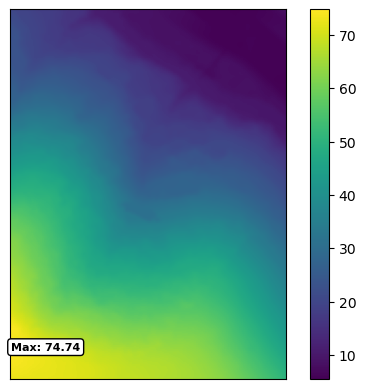

Maximum value in the array: 74.74


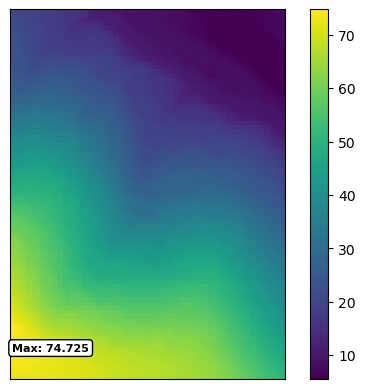

Maximum value in the array: 74.725


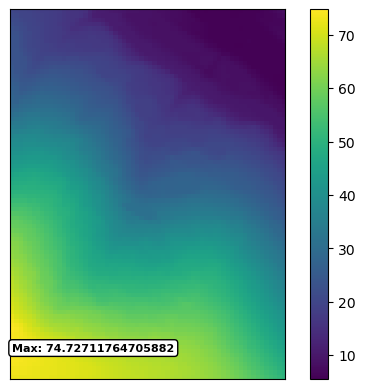

Maximum value in the array: 74.72711764705882


In [80]:
viz.plot_array(topo_array)
viz.plot_array(downsample_topo_0)
viz.plot_array(downsample_topo_1)

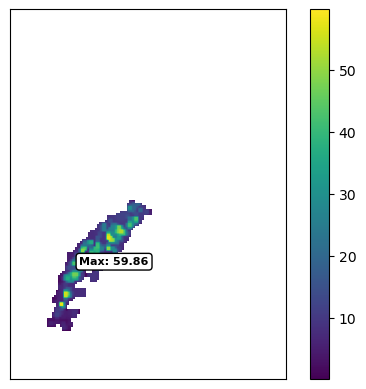

Maximum value in the array: 59.86


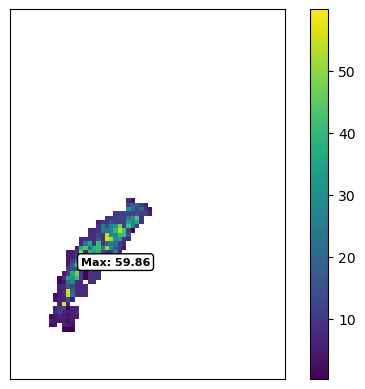

Maximum value in the array: 59.86


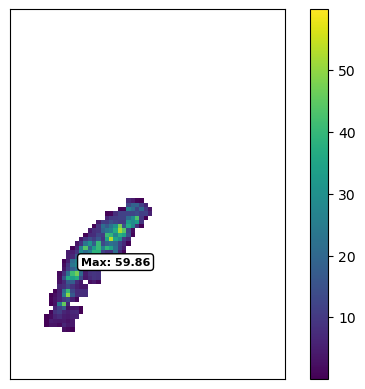

Maximum value in the array: 59.86


In [81]:
viz.plot_array(vel_array)
viz.plot_array(downsample_velocity_0)
viz.plot_array(downsample_velocity_1)

Original Data Statistics:
Mean: 36.08
Median: 34.98
Std: 19.43
Min: 5.53
Max: 74.74

Interpolated Data Statistics:
Mean: 36.09
Median: 34.93
Std: 19.51
Min: 5.57
Max: 74.73


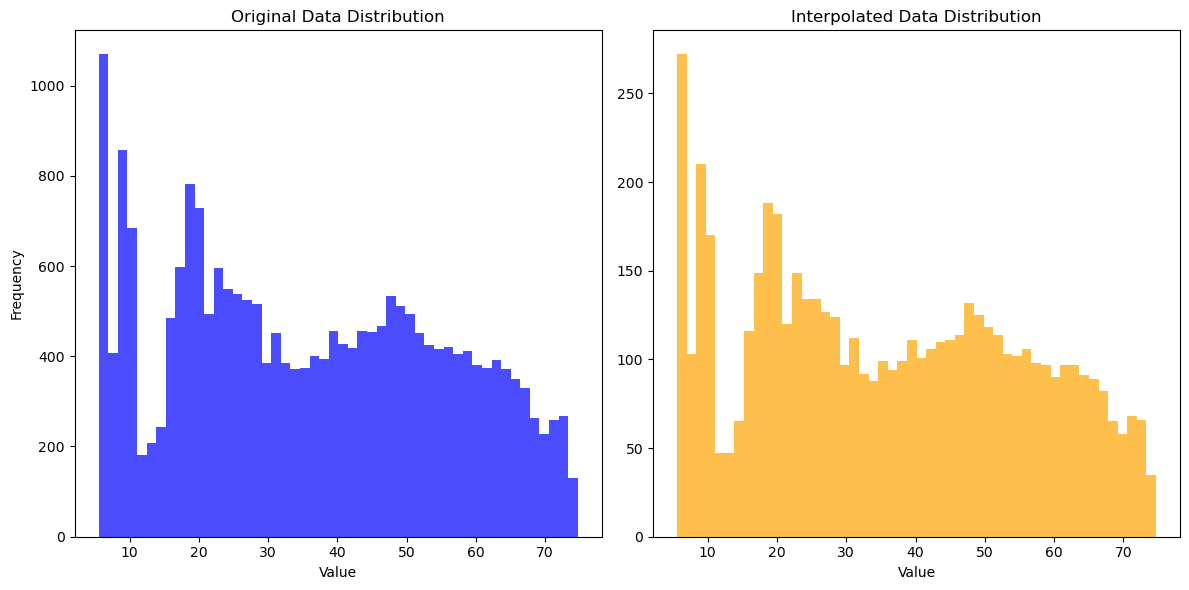

In [82]:
compare_distributions(topo_array, downsample_topo_1)

Original Data Statistics:
Mean: 0.74
Median: 0.00
Std: 4.43
Min: 0.00
Max: 59.86

Interpolated Data Statistics:
Mean: 0.74
Median: 0.00
Std: 4.25
Min: 0.00
Max: 59.86


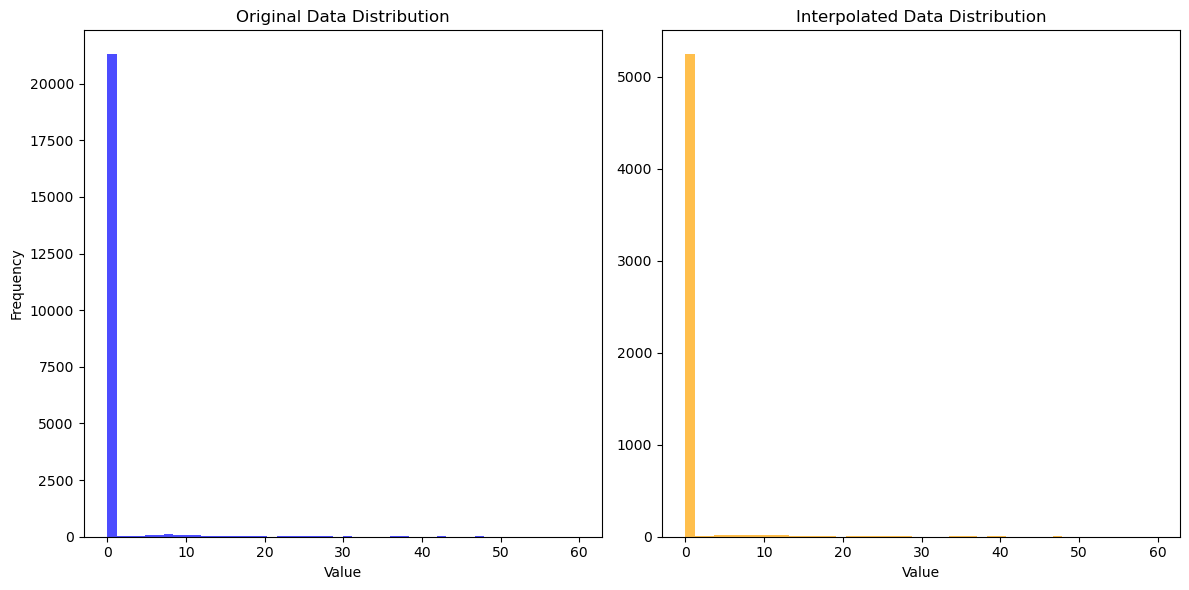

In [83]:
compare_distributions(vel_array, downsample_velocity_1)